# Project 1: Standardized Testing, Statistical Summaries and Inference

### Marco Tavora

## Overview 

Suppose that the College Board, a nonprofit organization responsible for administering the SAT (Scholastic Aptitude Test), seeks to increase the rate of high-school graduates who participate in its exams. This project's aim is to make recommendations about which measures the College Board might take in order to achieve that.

## Problem Statement

The problem we need to solve is to how to make actionable suggestions to the College Board to help them increase the participation rates in their exams. For that we need to perform an exploratory data analysis (EDA) to find appropriate metrics that can be adjusted by the College Board accordingly. 

Performing the EDA we must among other things:

- Find relevants patterns in the data 
- Search for possible relations between subsets of the data (for example, are scores and participation rates correlated? If yes how?)
- Test hypotheses about the data using statistical inference method
- Identify possible biases in the data and, if possible, suggest corrections



## Brief introduction to the data

The data is based on the SAT and the ACT (which stands for American College Testing and it is administered by another institution, namely, the ACT. Inc) exams from around the United States in 2017.

The data contains:

- Average SAT and ACT scores by state (scores for each section of each exam);

- Participation rates for both exams by state.

Both SAT and ACT are standardized tests for college admissions and are similar in content type but have some differences in structure. A few relevant differences are:

- The ACT has a Science Test and the SAT does not;

- There is a SAT Math Section for which the student is not allowed to use a calculator; 

- The SAT's College Board joins Reading and Writing into one score, the "Evidence-Based Reading and Writing" whereas in the ACT the tests are separated. 

## EDA Steps

### Step 0: Importing basic modules

We first need to import Python libraries including:
- `Pandas`, for data manipulation and analysis 
- `SciPy` which is a Python-based ecosystem of software for mathematics, science, and engineering. 
- `NumPy` which is a library consisting of multidimensional array objects and a collection of routines for processing of array. 
- `Statsmodels` which is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests and complements `SciPy`;
- `Matplotlib` is a plotting library for the Python and NumPy;
- `Seaborn` is complimentary to Matplotlib and it specifically targets statistical data visualization
- `Pylab` is embedded inside Matplotlib and provides a Matlab-like experience for the user. It imports portions of Matplotlib and NumPy.

OBS: This information was taken directly from the documentation.

In [1]:
import scipy
import pandas as pd
import scipy.stats as stats
import numpy as np
import csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pytest
import pylab as p
%matplotlib inline
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # so we can see the value of multiple statements at once.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/marcotavora/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 1: Load the data and perform basic operations.

#### 1 & 2. Load the data in, using pandas, and print the first ten rows of each DataFrame.

We can refer to the Pandas module using the "dot notation" to call its *methods*. To read our data (which is in the form of `csv` files), into a so-called DataFrame structure, we use the method `read_csv()` and pass in each file name as a string:

In [2]:
sat = pd.read_csv('sat.csv')
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [3]:
act = pd.read_csv('act.csv')
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


Note that the first columns of both tables seem to be identical to the DataFrame indexes. We can quickly confirm that using an `assert` statement. When an `assert` statement is encountered, Python evaluates it and if the expression is false raises an `AssertionError` exception (from www.tutorialspoint.com).

In [4]:
assert (sat.index.tolist() == sat['Unnamed: 0'].tolist())
assert (act.index.tolist() == act['Unnamed: 0'].tolist())

From the the box above we are allowed to drop the first columns of both DataFrames.

Next, I renamed the column "Evidence-Based Reading and Writing" as "EBRW" to be able to use methods on it via the dot notation. 

Dropping also the last column of the SAT table (which is just the sum of the two previous ones) and the last row and renaming the others we obtain the following DataFrame for the SAT scores:

In [5]:
cols_to_keep = ['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math']
sat = sat[cols_to_keep]
sat.columns = ['State', 'Participation', 'EBRW', 'Math']
sat.head()

,State,Participation,EBRW,Math
0,Alabama,5%,593,572
1,Alaska,38%,547,533
2,Arizona,30%,563,553
3,Arkansas,3%,614,594
4,California,53%,531,524


As with the SAT DataFrame, we drop last column of the ACT DataFrame (the Composite score is, according to the ACT website, just the average of the four other test scores, rounded to the nearest whole number).

Furthermore, I used the `.iloc( )` method to exclude the first row of the ACT frame since it is just a summary row.

In [6]:
cols_to_keep = ['State', 'Participation', 'English', 'Math', 'Reading', 'Science']
act = act.iloc[1:][cols_to_keep]
sat.head()
act.head()

,State,Participation,EBRW,Math
0,Alabama,5%,593,572
1,Alaska,38%,547,533
2,Arizona,30%,563,553
3,Arkansas,3%,614,594
4,California,53%,531,524


,State,Participation,English,Math,Reading,Science
1,Alabama,100%,18.9,18.4,19.7,19.4
2,Alaska,65%,18.7,19.8,20.4,19.9
3,Arizona,62%,18.6,19.8,20.1,19.8
4,Arkansas,100%,18.9,19.0,19.7,19.5
5,California,31%,22.5,22.7,23.1,22.2


#### 3. Describe in words what each variable (column) is.


**SAT**
    
The table displays three different averages for each state: 
  - The first column is the state 
  - The second column is the average participation of students in each state
  - The third and fourth columns are the average scores in the Math and Evidence-Based Reading and Writing tests (the name EBRW is explained above).

**ACT**
    
The table displays the following averages for each State: 
  - The first column is the state 
  - The second column is the average participation of students in that state
  - The third, fourth, fifth and sixth columns are the scores in the English, Math, Reading and Science tests

#### 4. Does the data look complete? Are there any obvious issues with the observations?

We can look for problems with the data for example:

- Using `info()` 
- Using `describe()`
- Looking at the last rows and or last columns which frequently contain aggregate values
- Looking for null values
- Outliers

The third item was taken care of. There were no null values but there are outliers as we shall see when we perform the plotting.

In [7]:
df_sat = sat.copy()  # making copies to keep original ones intact
df_act = act.copy()  # making copies to keep original ones intact
print (df_sat.isnull().any())
print (df_act.isnull().any())

State            False
Participation    False
EBRW             False
Math             False
dtype: bool
State            False
Participation    False
English          False
Math             False
Reading          False
Science          False
dtype: bool


#### 5. Print the types of each column.

In [8]:
print (sat.dtypes)
print (act.dtypes)

State            object
Participation    object
EBRW              int64
Math              int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.


I will convert the columns 'Participation' into `floats` using a function to extract the $\%$ but keeping the scale between 0 and 100. The `.replace( )` method takes the argument `regex` =`True` because `type('%')` = `str`. The function was based on http://pythonjourney.com/python-pandas-dataframe-convert-percent-to-float/

In [9]:
def perc_into_float(df,col):
    return df[col].replace('%','',regex=True).astype('float')

In [10]:
df_sat['Participation'] = perc_into_float(df_sat,'Participation')
df_act['Participation'] = perc_into_float(df_act,'Participation')

In [11]:
df_sat.head(2)

,State,Participation,EBRW,Math
0,Alabama,5.0,593,572
1,Alaska,38.0,547,533


In [12]:
df_act.head(2)

,State,Participation,English,Math,Reading,Science
1,Alabama,100.0,18.9,18.4,19.7,19.4
2,Alaska,65.0,18.7,19.8,20.4,19.9


Checking types again:

In [13]:
print (df_sat.dtypes)
print (df_act.dtypes)

State             object
Participation    float64
EBRW               int64
Math               int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object


#### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

**Answer version 1**

Using a list comprehension, the command:

    df.set_index('State').to_dict()
  
creates a dictionary with column names as keys. For example:

In [14]:
print (df_sat.set_index('State').to_dict())

{'Participation': {'Alabama': 5.0, 'Alaska': 38.0, 'Arizona': 30.0, 'Arkansas': 3.0, 'California': 53.0, 'Colorado': 11.0, 'Connecticut': 100.0, 'Delaware': 100.0, 'District of Columbia': 100.0, 'Florida': 83.0, 'Georgia': 61.0, 'Hawaii': 55.0, 'Idaho': 93.0, 'Illinois': 9.0, 'Indiana': 63.0, 'Iowa': 2.0, 'Kansas': 4.0, 'Kentucky': 4.0, 'Louisiana': 4.0, 'Maine': 95.0, 'Maryland': 69.0, 'Massachusetts': 76.0, 'Michigan': 100.0, 'Minnesota': 3.0, 'Mississippi': 2.0, 'Missouri': 3.0, 'Montana': 10.0, 'Nebraska': 3.0, 'Nevada': 26.0, 'New Hampshire': 96.0, 'New Jersey': 70.0, 'New Mexico': 11.0, 'New York': 67.0, 'North Carolina': 49.0, 'North Dakota': 2.0, 'Ohio': 12.0, 'Oklahoma': 7.0, 'Oregon': 43.0, 'Pennsylvania': 65.0, 'Rhode Island': 71.0, 'South Carolina': 50.0, 'South Dakota': 3.0, 'Tennessee': 5.0, 'Texas': 62.0, 'Utah': 3.0, 'Vermont': 60.0, 'Virginia': 65.0, 'Washington': 64.0, 'West Virginia': 14.0, 'Wisconsin': 3.0, 'Wyoming': 3.0}, 'EBRW': {'Alabama': 593, 'Alaska': 547, 'A

We obtain the dictionary values using

    [cols[i]],
    
where `cols` are the column names and `cols[i]` are the keys for $i$ within the range of the number of columns. We then return the elements of this list of dictionaries.

In [15]:
def dict_all(df,cols,n):
    return [df.set_index('State').to_dict()[cols[i]] for i in range(1,len(cols))][n]

In [16]:
dsat_part = dict_all(df_sat,df_sat.columns.tolist(),0)
dsat_EBRW = dict_all(df_sat,df_sat.columns.tolist(),1)
dsat_math = dict_all(df_sat,df_sat.columns.tolist(),2)

Example:

In [17]:
print( dsat_EBRW)

{'Alabama': 593, 'Alaska': 547, 'Arizona': 563, 'Arkansas': 614, 'California': 531, 'Colorado': 606, 'Connecticut': 530, 'Delaware': 503, 'District of Columbia': 482, 'Florida': 520, 'Georgia': 535, 'Hawaii': 544, 'Idaho': 513, 'Illinois': 559, 'Indiana': 542, 'Iowa': 641, 'Kansas': 632, 'Kentucky': 631, 'Louisiana': 611, 'Maine': 513, 'Maryland': 536, 'Massachusetts': 555, 'Michigan': 509, 'Minnesota': 644, 'Mississippi': 634, 'Missouri': 640, 'Montana': 605, 'Nebraska': 629, 'Nevada': 563, 'New Hampshire': 532, 'New Jersey': 530, 'New Mexico': 577, 'New York': 528, 'North Carolina': 546, 'North Dakota': 635, 'Ohio': 578, 'Oklahoma': 530, 'Oregon': 560, 'Pennsylvania': 540, 'Rhode Island': 539, 'South Carolina': 543, 'South Dakota': 612, 'Tennessee': 623, 'Texas': 513, 'Utah': 624, 'Vermont': 562, 'Virginia': 561, 'Washington': 541, 'West Virginia': 558, 'Wisconsin': 642, 'Wyoming': 626}


In [18]:
dact_part = dict_all(df_sat,df_sat.columns.tolist(),0)
dact_eng = dict_all(df_act,df_act.columns.tolist(),1)
dact_math = dict_all(df_act,df_act.columns.tolist(),2)
dact_read = dict_all(df_act,df_act.columns.tolist(),3)
dact_sci = dict_all(df_act,df_act.columns.tolist(),4)

Example:

In [19]:
print( dact_part)

{'Alabama': 5.0, 'Alaska': 38.0, 'Arizona': 30.0, 'Arkansas': 3.0, 'California': 53.0, 'Colorado': 11.0, 'Connecticut': 100.0, 'Delaware': 100.0, 'District of Columbia': 100.0, 'Florida': 83.0, 'Georgia': 61.0, 'Hawaii': 55.0, 'Idaho': 93.0, 'Illinois': 9.0, 'Indiana': 63.0, 'Iowa': 2.0, 'Kansas': 4.0, 'Kentucky': 4.0, 'Louisiana': 4.0, 'Maine': 95.0, 'Maryland': 69.0, 'Massachusetts': 76.0, 'Michigan': 100.0, 'Minnesota': 3.0, 'Mississippi': 2.0, 'Missouri': 3.0, 'Montana': 10.0, 'Nebraska': 3.0, 'Nevada': 26.0, 'New Hampshire': 96.0, 'New Jersey': 70.0, 'New Mexico': 11.0, 'New York': 67.0, 'North Carolina': 49.0, 'North Dakota': 2.0, 'Ohio': 12.0, 'Oklahoma': 7.0, 'Oregon': 43.0, 'Pennsylvania': 65.0, 'Rhode Island': 71.0, 'South Carolina': 50.0, 'South Dakota': 3.0, 'Tennessee': 5.0, 'Texas': 62.0, 'Utah': 3.0, 'Vermont': 60.0, 'Virginia': 65.0, 'Washington': 64.0, 'West Virginia': 14.0, 'Wisconsin': 3.0, 'Wyoming': 3.0}


**Answer version 2**

In [20]:
def func_dict_v2(df,col_name):
    return {df['State'][i]:df[col_name][i] for i in range(df.shape[0])}

In [21]:
dsat_part_v2 = func_dict_v2(df_sat,'Participation')
dsat_EBRW_v2 = func_dict_v2(df_sat,'EBRW')
dsat_math_v2 = func_dict_v2(df_sat,'Math')

In [22]:
assert(dsat_math == dsat_math_v2)
assert(dsat_part == dsat_part_v2)
assert(dsat_math == dsat_math_v2)

But **let us use Version 1.**

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

Using a simple dictionary comprehension.

In [23]:
def dict_col(df):
    return {col:df[col].tolist() for col in df.columns}

In [24]:
print (dict_col(df_sat))
print ("")
print (dict_col(df_act))

{'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [5.0, 38.0, 30.0, 3.0, 53.0, 11.0, 100.0, 100.0, 100.0, 83.0, 61.0, 55.0, 93.0, 9.0, 63.0, 2.0, 4.0, 4.0, 4.0, 95.0, 69.0, 76.0, 100.0, 3.0, 2.0, 3.0, 10.0, 3.0, 26.0, 96.0, 70.0, 11.0, 67.0, 49.0, 2.0, 12.0, 7.0, 43.0, 65.0, 71.0, 50.0, 3.0, 5.0, 62.0, 3.0, 60.0, 65.0, 64.0, 14.0, 3.0, 3.0], 'EBRW': [593, 547, 563, 614, 53

##### 9. Merge the dataframes on the state column.

In [25]:
df_total = pd.merge(df_sat, df_act, on='State')

In [26]:
df_total.head()

,State,Participation_x,EBRW,Math_x,Participation_y,English,Math_y,Reading,Science
0,Alabama,5.0,593,572,100.0,18.9,18.4,19.7,19.4
1,Alaska,38.0,547,533,65.0,18.7,19.8,20.4,19.9
2,Arizona,30.0,563,553,62.0,18.6,19.8,20.1,19.8
3,Arkansas,3.0,614,594,100.0,18.9,19.0,19.7,19.5
4,California,53.0,531,524,31.0,22.5,22.7,23.1,22.2


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [27]:
df_total = pd.merge(df_sat, df_act, on='State')
df_total.columns = ['State','Participation_SAT (%)','EBRW_SAT','Math_SAT',\
                   'Participation_ACT (%)','English_ACT','Math_ACT','Reading_ACT','Science_ACT']
df_total.head(3)

,State,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
0,Alabama,5.0,593,572,100.0,18.9,18.4,19.7,19.4
1,Alaska,38.0,547,533,65.0,18.7,19.8,20.4,19.9
2,Arizona,30.0,563,553,62.0,18.6,19.8,20.1,19.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [28]:
df_total.describe().loc[['min','max']]

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
min,2.0,482.0,52.0,8.0,16.3,18.0,18.1,2.3
max,100.0,644.0,651.0,100.0,25.5,25.3,26.0,24.9


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [29]:
def stdev(X):
    n = len(X)
    return ((1.0/n)*np.sum([(x-np.mean(X))**2 for x in X]))**(0.5)

In [30]:
cols = df_total.columns[1:].tolist()
sd = [round( stdev([df_total[col].tolist() for col in cols][i] ) ,3) for i in range(0,len(cols))]
print (sd)

[34.929, 45.217, 84.073, 31.824, 2.33, 1.962, 2.047, 3.151]


Note that Pandas calculates `std` DataFrame using $n-1$ as denominator instead of $n$:

In [31]:
df_total.describe().loc[['std']]

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
std,35.276632,45.666901,84.909119,32.140842,2.353677,1.981989,2.067271,3.182463


Setting the number of ${\rm{ddof}}=0$ solves this issue and we obtain the same values as the list `sd`.

In [32]:
df_total.std(ddof=0)

Participation_SAT (%)    34.929071
EBRW_SAT                 45.216970
Math_SAT                 84.072555
Participation_ACT (%)    31.824176
English_ACT               2.330488
Math_ACT                  1.962462
Reading_ACT               2.046903
Science_ACT               3.151108
dtype: float64

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

I first put `State` as index and then concatenate the new row, renaming it.

In [33]:
df_total_new = df_total.copy()
df_total_new = df_total_new.set_index('State')
df_total_new.head()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
State,,,,,,,,
Alabama,5.0,593,572,100.0,18.9,18.4,19.7,19.4
Alaska,38.0,547,533,65.0,18.7,19.8,20.4,19.9
Arizona,30.0,563,553,62.0,18.6,19.8,20.1,19.8
Arkansas,3.0,614,594,100.0,18.9,19.0,19.7,19.5
California,53.0,531,524,31.0,22.5,22.7,23.1,22.2


In [34]:
df2 = pd.DataFrame([[34.929, 45.217, 84.073, 31.824, 2.33, 1.962, 2.047, 3.151]],columns=df_total_new.columns)
df_total_new = pd.concat([df2,df_total_new])

In [35]:
df_total_new = df_total_new.rename(index={df_total_new.index[0]: 'sd'})
df_total_new.head()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
sd,34.929,45.217,84.073,31.824,2.33,1.962,2.047,3.151
Alabama,5.000,593.000,572.000,100.000,18.90,18.400,19.700,19.400
Alaska,38.000,547.000,533.000,65.000,18.70,19.800,20.400,19.900
Arizona,30.000,563.000,553.000,62.000,18.60,19.800,20.100,19.800
Arkansas,3.000,614.000,594.000,100.000,18.90,19.000,19.700,19.500


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

I will start from the DataFrame without the `sd` and include it afterwards:

In [36]:
df_total_new = df_total.copy() 
df_total_new = df_total_new.set_index('State').sort_values("Participation_SAT (%)",ascending=False)
df_total_new = pd.concat([df2,df_total_new])
df_total_new = df_total_new.rename(index={df_total_new.index[0]: 'sd'})

df_total_new.head()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
sd,34.929,45.217,84.073,31.824,2.33,1.962,2.047,3.151
District of Columbia,100.000,482.000,468.000,32.000,24.40,23.500,24.900,23.500
Michigan,100.000,509.000,495.000,29.000,24.10,23.700,24.500,23.800
Connecticut,100.000,530.000,512.000,31.000,25.50,24.600,25.600,24.600
Delaware,100.000,503.000,492.000,18.000,24.10,23.400,24.800,23.600


In [37]:
df_total_new[['Participation_SAT (%)']].head(20)

,Participation_SAT (%)
sd,34.929
District of Columbia,100.000
Michigan,100.000
Connecticut,100.000
Delaware,100.000
New Hampshire,96.000
Maine,95.000
Idaho,93.000
Florida,83.000
Massachusetts,76.000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

I printed out the tail to check.

In [38]:
df_total_new = df_total_new[df_total_new['Participation_SAT (%)']>50]
df_total_new.tail()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
Texas,62.0,513.0,507.0,45.0,19.5,20.7,21.1,20.9
Georgia,61.0,535.0,515.0,55.0,21.0,20.9,22.0,21.3
Vermont,60.0,562.0,551.0,29.0,23.3,23.1,24.4,23.2
Hawaii,55.0,544.0,541.0,90.0,17.8,19.2,19.2,19.3
California,53.0,531.0,524.0,31.0,22.5,22.7,23.1,22.2


## Step 3: Visualize the data

#### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

There are certain technical criteria for the optimal choice of number of bins which will not be used here but are briefly described in the end of the notebook. We will follow the heuristical "not too large, not too little" bin size criterion.

There is an outlier which we will exclude now for good measure:

In [39]:
df_total_new = df_total_new[df_total_new.index != 'Maryland']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1139db320>],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a3b400>],
      dtype=object)

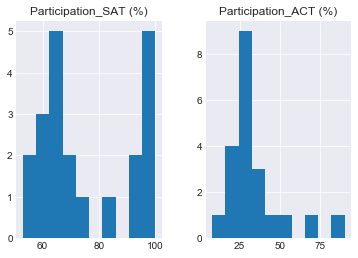

In [40]:
p1 = df_total_new[['Participation_SAT (%)']]
p2 = df_total_new[['Participation_ACT (%)']]

fig, axes = plt.subplots(1, 2)
p1.hist('Participation_SAT (%)', bins=10, ax=axes[0])
p2.hist('Participation_ACT (%)', bins=10, ax=axes[1])

##### 17. Plot the Math(s) distributions from both data sets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a8d780>],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113b94da0>],
      dtype=object)

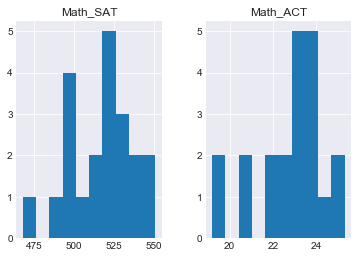

In [41]:
p1 = df_total_new[['Math_SAT']]
p2 = df_total_new[['Math_ACT']]

fig, axes = plt.subplots(1, 2)

p1.hist('Math_SAT', bins=10, ax=axes[0])
p2.hist('Math_ACT', bins=10, ax=axes[1])

##### 18. Plot the Verbal distributions from both data sets.

In the ACT scores I joined English and reading into one Verbal section following SAT's strategy:

In [42]:
df_total_new['Verbal_ACT'] = (df_total_new['English_ACT'] + df_total_new['Reading_ACT'])/2
df_total_new.head()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT,Verbal_ACT
District of Columbia,100.0,482.0,468.0,32.0,24.4,23.5,24.9,23.5,24.65
Michigan,100.0,509.0,495.0,29.0,24.1,23.7,24.5,23.8,24.30
Connecticut,100.0,530.0,512.0,31.0,25.5,24.6,25.6,24.6,25.55
Delaware,100.0,503.0,492.0,18.0,24.1,23.4,24.8,23.6,24.45
New Hampshire,96.0,532.0,520.0,18.0,25.4,25.1,26.0,24.9,25.70


Next I change syntax and disposition of plots to make the x-axis labels more legible

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11463d908>],
      dtype=object)

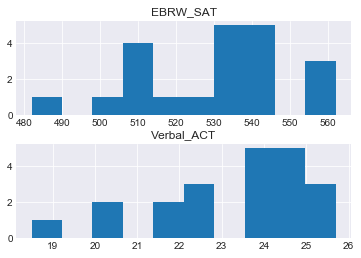

In [43]:
columns = ['EBRW_SAT','Verbal_ACT']
df_total_new.hist(column=columns, layout=(2,1))

We can do other plots using seaborn as well.

In [44]:
print( df_total_new.columns.tolist())

['Participation_SAT (%)', 'EBRW_SAT', 'Math_SAT', 'Participation_ACT (%)', 'English_ACT', 'Math_ACT', 'Reading_ACT', 'Science_ACT', 'Verbal_ACT']


##### 1) New ones:

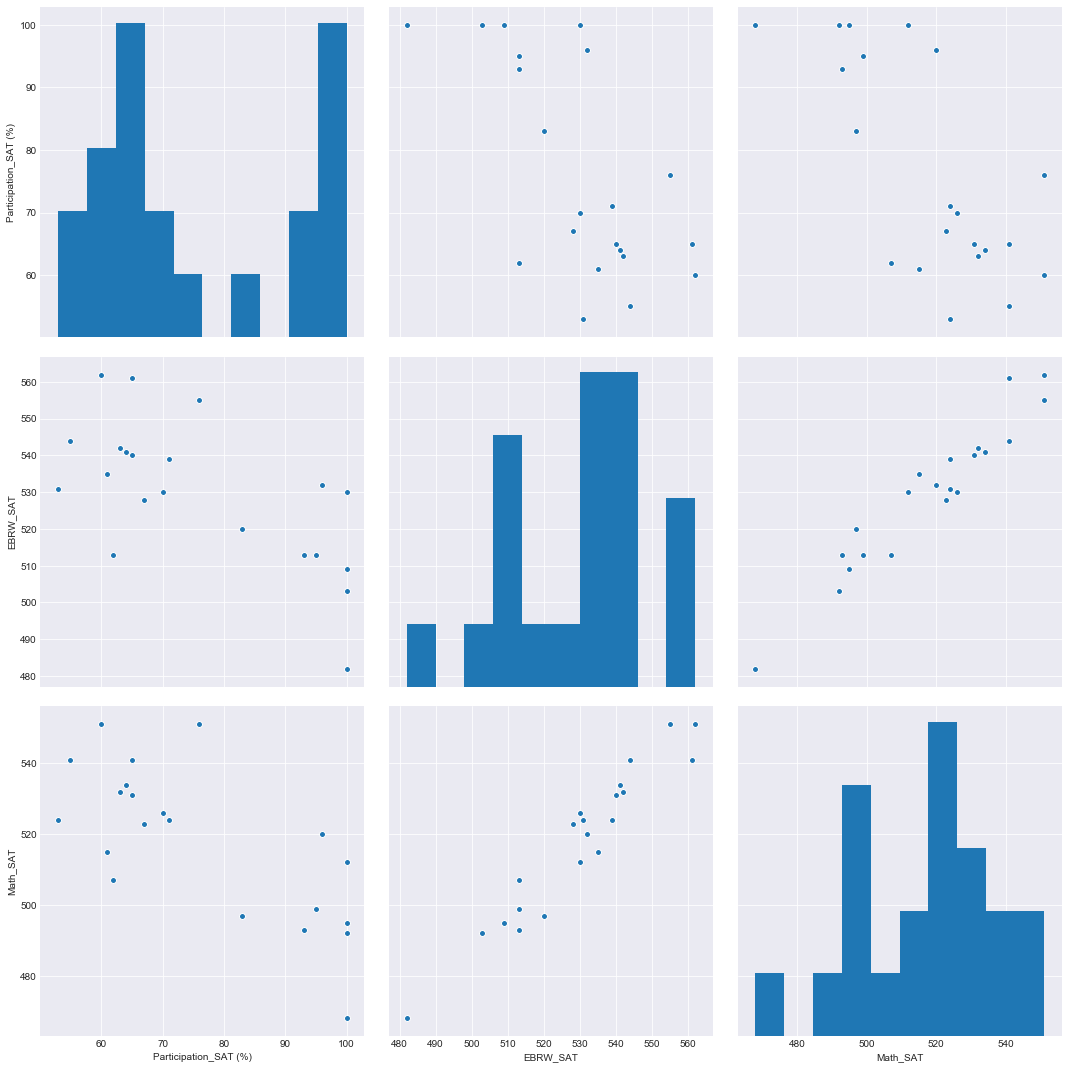

In [45]:
sns.pairplot(df_total_new[['Participation_SAT (%)', 'EBRW_SAT', 'Math_SAT']], size=5)

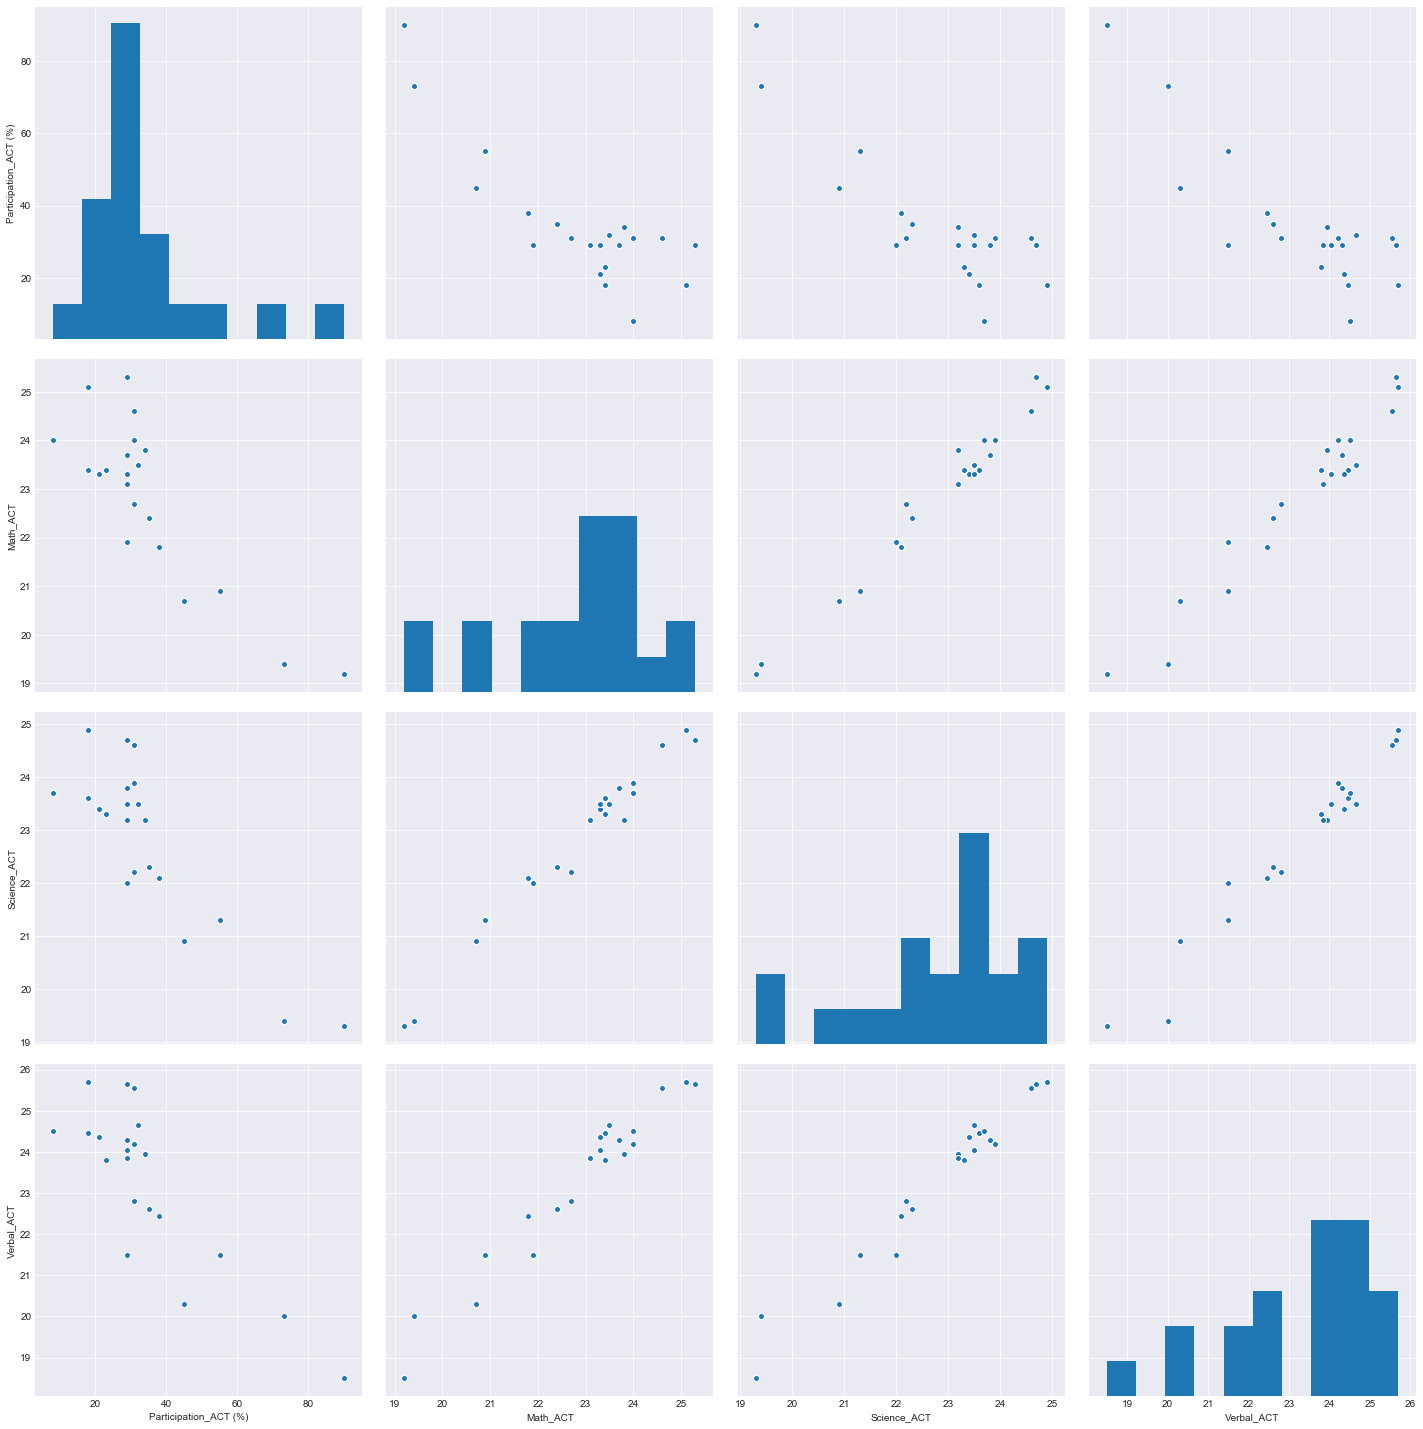

In [46]:
sns.pairplot(df_total_new[['Participation_ACT (%)', 'Math_ACT', 'Science_ACT','Verbal_ACT',]], size=5)
# point are too small though (don't know yet how to increase them)

##### 2) Old ones:

I plotted just for the SAT to avoid excess repetition.

Text(0.5,1,'Participation_SAT (%)')

Text(0.5,1,'SAT Math')

Text(0.5,1,'SAT Evidence-Based Reading and Writing')

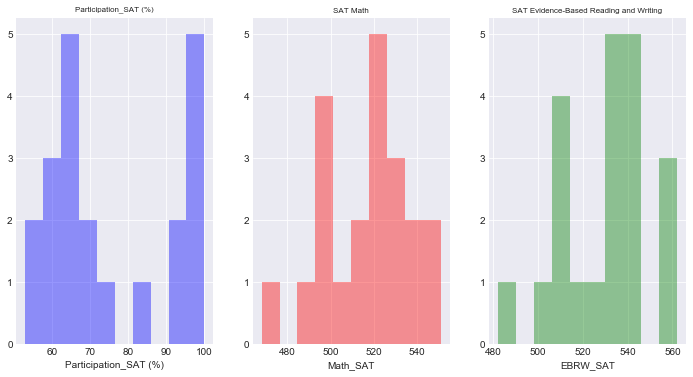

In [47]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(12,6))

axs[0] = sns.distplot(df_total_new['Participation_SAT (%)'], kde=False, color='blue', ax=axs[0], bins=10)
axs[1] = sns.distplot(df_total_new['Math_SAT'], kde=False, color='red', ax=axs[1], bins=10)
axs[2] = sns.distplot(df_total_new['EBRW_SAT'], kde=False, color='green', ax=axs[2], bins=10)


axs[0].set_title('Participation_SAT (%)', fontsize=8)
axs[1].set_title('SAT Math', fontsize=8)
axs[2].set_title('SAT Evidence-Based Reading and Writing', fontsize=8)

plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That they are normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

No. In fact some of the distributions seem to be bimodal (two peaks in the distribution). 

##### 21. Plot some scatterplots examining relationships between all variables.

I will make several plots and make the commentaries after them.

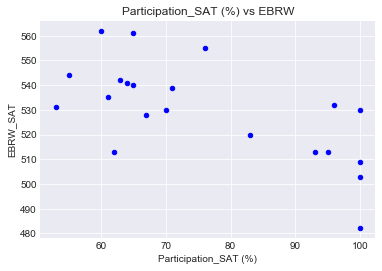

In [48]:
df_total_new.plot(kind='scatter', x='Participation_SAT (%)', y='EBRW_SAT', c='blue', title='Participation_SAT (%) vs EBRW')

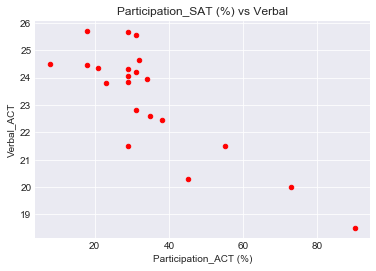

In [49]:
df_total_new.plot(kind='scatter', x='Participation_ACT (%)', y='Verbal_ACT', c='red', title='Participation_SAT (%) vs Verbal')

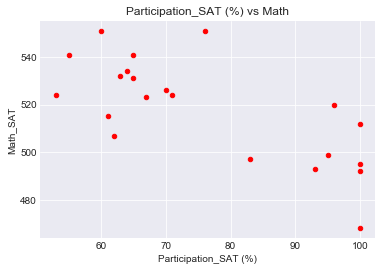

In [50]:
df_total_new.plot(kind='scatter', x='Participation_SAT (%)', y='Math_SAT', c='red', title='Participation_SAT (%) vs Math')

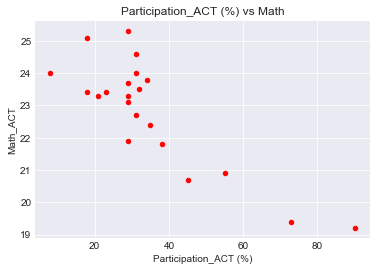

In [51]:
df_total_new.plot(kind='scatter', x='Participation_ACT (%)', y='Math_ACT', c='red', title='Participation_ACT (%) vs Math')

Text(0.5,0,'Rate')

Text(0.5,1,'SAT correlation between Math and EBRW scores')

(50, 105)

(450, 600)

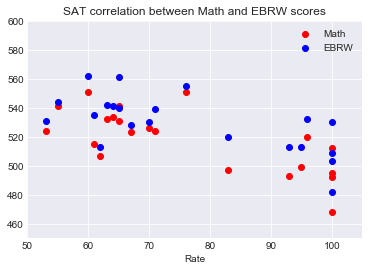

In [52]:
df_aux = df_total_new.copy()  # To backup
plt.scatter(df_aux['Participation_SAT (%)'],df_aux['Math_SAT'], color = 'r', label='Math')
plt.scatter(df_aux['Participation_SAT (%)'],df_aux['EBRW_SAT'], color = 'b', label='EBRW')
plt.xlabel('Rate')
plt.title('SAT correlation between Math and EBRW scores')
plt.grid(True)
plt.xlim([50,105])
plt.ylim([450,600])
plt.legend(loc='upper right')
plt.show()

Same plot as above with different $y$-range show the negative correlation more clearly:

Text(0.5,0,'Rate')

Text(0.5,1,'SAT correlation between Math and EBRW scores')

(50, 105)

(400, 650)

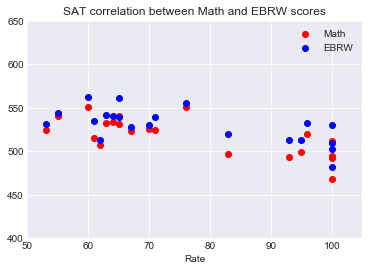

In [53]:
plt.scatter(df_aux['Participation_SAT (%)'],df_aux['Math_SAT'], color = 'r', label='Math')
plt.scatter(df_aux['Participation_SAT (%)'],df_aux['EBRW_SAT'], color = 'b', label='EBRW')
plt.xlabel('Rate')
plt.title('SAT correlation between Math and EBRW scores')
plt.grid(True)
plt.xlim([50,105])
plt.ylim([400,650])
plt.legend(loc='upper right')
plt.show()

Text(0.5,0,'Rate')

Text(0.5,1,'ACT correlation between Math and Verbal')

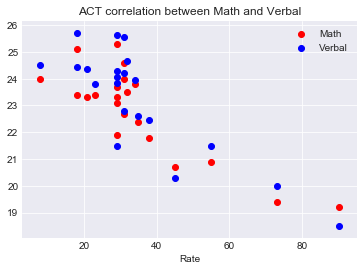

In [54]:
plt.scatter(df_aux['Participation_ACT (%)'],df_aux['Math_ACT'], color = 'r', label='Math')
plt.scatter(df_aux['Participation_ACT (%)'],df_aux['Verbal_ACT'], color = 'b', label='Verbal')
plt.xlabel('Rate')
plt.title('ACT correlation between Math and Verbal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

##### 22. Are there any interesting relationships to note?

- Participation rate and scores seem to be "universally" negatively correlated. A larger fraction of students taking the tests is correlated with lower average grades for all tests in both SAT and ACT. This may have several explanations. One of them could be lack of incentive from public schools, in some states, for students to take the exams. Tesk takes would then come mostly from private schools which tend to score better. This issue must be investigated in much more detail and there are a multitude of articles online discussing the topics.

- Good or bad performance in Math and Verbal tests seem to occur together i.e. student on average do well in both or in neither. 

##### 23. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11ceb2f60>],
 'caps': [<matplotlib.lines.Line2D at 0x11cebca58>,
 'fliers': [<matplotlib.lines.Line2D at 0x11cec47b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11cec4358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11cebc128>,
  <matplotlib.lines.Line2D at 0x11cebc5f8>]}

Text(0.5,1,'Box plot for Participation_SAT (%)')

{'boxes': [<matplotlib.lines.Line2D at 0x11cf067b8>],
 'caps': [<matplotlib.lines.Line2D at 0x11cf0e2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11cf0efd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11cf0eb70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11cf06940>,
  <matplotlib.lines.Line2D at 0x11cf06e10>]}

Text(0.5,1,'Box plot for EBRW_SAT')

{'boxes': [<matplotlib.lines.Line2D at 0x11cf552e8>],
 'caps': [<matplotlib.lines.Line2D at 0x11cf55da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11cf5cb00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11cf5c6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11cf55470>,
  <matplotlib.lines.Line2D at 0x11cf55940>]}

Text(0.5,1,'Box plot for Math_SAT')

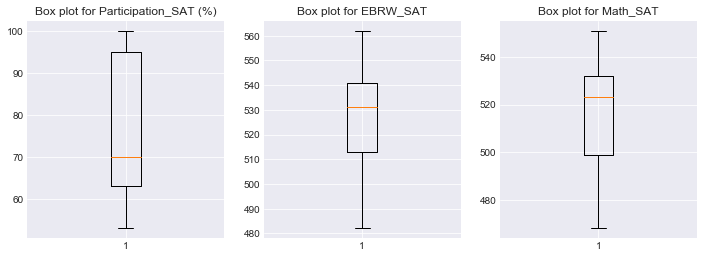

In [55]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
plt.boxplot(df_aux['Participation_SAT (%)'])
ax1.set_title('Box plot for Participation_SAT (%)')

ax2 = fig.add_subplot(132)
plt.boxplot(df_aux['EBRW_SAT'])
ax2.set_title('Box plot for EBRW_SAT')

ax3 = fig.add_subplot(133)
plt.boxplot(df_aux['Math_SAT'])
ax3.set_title('Box plot for Math_SAT')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x11d077c50>],
 'caps': [<matplotlib.lines.Line2D at 0x11d081748>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d08a4a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d08a048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d077dd8>,
  <matplotlib.lines.Line2D at 0x11d0812e8>]}

Text(0.5,1,'Box plot for Participation_ACT (%)')

{'boxes': [<matplotlib.lines.Line2D at 0x11d0ca4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x11d0caf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d0d2cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d0d2898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d0ca668>,
  <matplotlib.lines.Line2D at 0x11d0cab38>]}

Text(0.5,1,'Box plot for Verbal_ACT')

{'boxes': [<matplotlib.lines.Line2D at 0x11d116198>],
 'caps': [<matplotlib.lines.Line2D at 0x11d116c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d11f9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d11f550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d116320>,
  <matplotlib.lines.Line2D at 0x11d1167f0>]}

Text(0.5,1,'Box plot for Math_ACT')

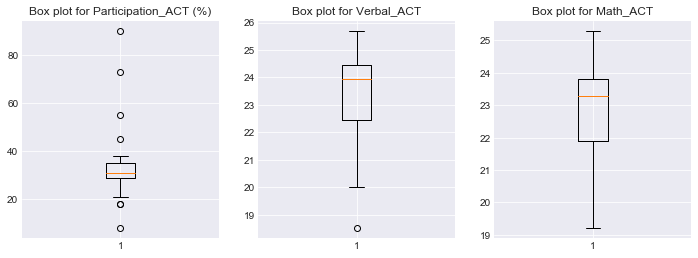

In [56]:
df_aux = df_total_new.copy()
df_aux['Verbal_ACT'] = (df_aux['English_ACT'] + df_aux['Reading_ACT'])/2

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
plt.boxplot(df_aux['Participation_ACT (%)'])
ax1.set_title('Box plot for Participation_ACT (%)')

ax2 = fig.add_subplot(132)
plt.boxplot(df_aux['Verbal_ACT'])
ax2.set_title('Box plot for Verbal_ACT')

ax3 = fig.add_subplot(133)
plt.boxplot(df_aux['Math_ACT'])
ax3.set_title('Box plot for Math_ACT')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

##### To be done.

## Step 4: Descriptive and Inferential Statistics

#### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

We look into the mean, standard deviation and degree of skewness. The median and the $50\%$ percentil values are the same by definition. 

In [57]:
df_aux[cols].describe().loc[['mean','std','50%']]

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT
mean,76.142857,529.666667,517.904762,34.666667,22.833333,22.833333,23.704762,22.800000
std,16.950769,19.652820,21.586813,18.521159,2.144139,1.669830,1.769315,1.553061
50%,70.000000,531.000000,523.000000,31.000000,23.500000,23.300000,24.400000,23.300000


For example, magnitude of percentual differences between means and medians (values are in percentage so they are indeed low for the scores!):

In [58]:
for col in df_aux.columns.tolist():
    print (col,":",np.abs(100*(df_aux[col].describe().loc['mean']/df_aux[col].describe().loc['50%']-1)))

Participation_SAT (%) : 8.775510204081627
EBRW_SAT : 0.25109855618330457
Math_SAT : 0.9742329053992527
Participation_ACT (%) : 11.827956989247301
English_ACT : 2.8368794326241176
Math_ACT : 2.002861230329045
Reading_ACT : 2.849336455893814
Science_ACT : 2.145922746781126
Verbal_ACT : 2.8432249726612957


#### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

**25.1) Let us look at correlations:**

In [59]:
cols_SAT = ['Participation_SAT (%)', 'EBRW_SAT', 'Math_SAT']
cols_ACT = [ 'Participation_ACT (%)', 'Math_ACT', 'Science_ACT', 'Verbal_ACT']

**SAT**

- For the SAT we see that the Math and EBRW scores are highly positively correlated
- The participation rate and both scores have also a relatively strong negative correlation as discussed before.

In [60]:
corr_SAT = df_aux[cols_SAT].corr()
corr_SAT

,Participation_SAT (%),EBRW_SAT,Math_SAT
Participation_SAT (%),1.000000,-0.656950,-0.718164
EBRW_SAT,-0.656950,1.000000,0.961519
Math_SAT,-0.718164,0.961519,1.000000


**ACT**

- For the ACT we see that the Math, EBRW and Science scores are highly positively correlated as well
- As in the SAT the participation rate and both scores have also a strong negative correlation but in the ACT it us slightly stronger

In [61]:
corr_ACT = df_aux[cols_ACT].corr()
corr_ACT

,Participation_ACT (%),Math_ACT,Science_ACT,Verbal_ACT
Participation_ACT (%),1.000000,-0.839660,-0.854699,-0.835211
Math_ACT,-0.839660,1.000000,0.987912,0.974774
Science_ACT,-0.854699,0.987912,1.000000,0.980839
Verbal_ACT,-0.835211,0.974774,0.980839,1.000000


**25.2) Skewness general observations**

The skewness is an important metric and is related to the mean and median. It can be measured using Pearson's coefficient, namely:

$${g_1} = \frac{{{\mu _3}}}{{{\sigma ^3}}}$$


where the numerator is the third momentum. One way to relate the difference between mean and median to the skewness is to use (which is valid *for some particular distributions*):

$$ g_1 = 2(\mu-{\rm{mode}})/\sigma$$   

or

$$ \mu-{\rm{mode}} = (1/2) g_1 \sigma$$

Though this equality is not valid in general, *an estimation of skewness as an indirect measure of the difference between mode and median and vice-versa may be used heuristically.*

**25.3) In our case**

In our case, consider the Math scores for example. The median is larger so $g_1<0$. If the left tail is more pronounced than the right one the function has negative skewness. As we see below (where I reproduced the plots), the left tail is indeed more pronounced.

In [62]:
g1_SAT = 2*(np.mean(df_aux['Math_SAT'])-np.median(df_aux['Math_SAT']))/  np.std(df_aux['Math_SAT'])
print ("g1 from SAT Math is:", g1_SAT)

g1 from SAT Math is: -0.4837273105976173


In [63]:
g1_ACT = 2*(np.mean(df_aux['Math_ACT'])-np.median(df_aux['Math_ACT']))/  np.std(df_aux['Math_ACT'])
print ("g1 from ACT is:", g1_ACT)

g1 from ACT is: -0.5727420648104604


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11caff390>],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d256f98>],
      dtype=object)

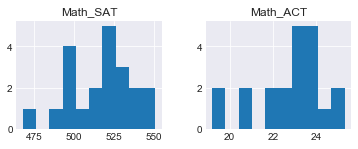

In [64]:
p1 = df_total_new[['Math_SAT']]
p2 = df_total_new[['Math_ACT']]

fig, axes = plt.subplots(1, 2,figsize=(6,2))

p1.hist('Math_SAT', bins=10, ax=axes[0])
p2.hist('Math_ACT', bins=10, ax=axes[1])

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

The full population of high-school graduates is divided into two groups namely, SAT test takers and ACT test takers. 

Suppose I want to test whether the true population mean of the participation rates are different between the SAT and ACT. Our hypotheses have the form: 


$${H_0}:\,{\mu _{{\rm{PR,SAT}}}} = \,{\mu _{{\rm{PR,ACT}}}}\\
{H_{\rm{A}}}:\,{\mu _{{\rm{PR,SAT}}}} \ne {\mu _{{\rm{PR,ACT}}}}$$



To obtain the $p$-value we use:

In [65]:
"p-value is:",stats.ttest_ind(df_aux['Participation_SAT (%)'],df_aux['Participation_ACT (%)'])[1]

('p-value is:', 3.0499821970067098e-09)

This is much smaller than $\alpha$ so we reject the null hypothesis and conclude that both means differ at this level of confidence.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

From below I conclude that I am 95$\%$ confident that the true mean rate for the SAT participation is within (26.261598995475964, 43.071734337857364) and that the true mean rate for the ACT participation is within (68.450446510874016, 83.835267774840261).

In [66]:
#print df_aux['Participation_ACT (%)'].mean()
#print df_aux['Participation_SAT (%)'].mean()

In [67]:
df_aux.head()

,Participation_SAT (%),EBRW_SAT,Math_SAT,Participation_ACT (%),English_ACT,Math_ACT,Reading_ACT,Science_ACT,Verbal_ACT
District of Columbia,100.0,482.0,468.0,32.0,24.4,23.5,24.9,23.5,24.65
Michigan,100.0,509.0,495.0,29.0,24.1,23.7,24.5,23.8,24.30
Connecticut,100.0,530.0,512.0,31.0,25.5,24.6,25.6,24.6,25.55
Delaware,100.0,503.0,492.0,18.0,24.1,23.4,24.8,23.6,24.45
New Hampshire,96.0,532.0,520.0,18.0,25.4,25.1,26.0,24.9,25.70


In [68]:
stats.t.interval(0.95,df_aux['Participation_ACT (%)'].shape[0],loc = df_aux['Participation_ACT (%)'].mean(),
                 scale = (np.std(df_aux['Participation_ACT (%)'], ddof = 1)) / df_aux['Participation_ACT (%)'].shape[0] ** 0.5)

(26.261598995475964, 43.071734337857364)

In [70]:
stats.t.interval(0.95,df_aux['Participation_SAT (%)'].shape[0],loc = df_aux['Participation_SAT (%)'].mean(),
                 scale = (np.std(df_aux['Participation_SAT (%)'], ddof = 1)) / df_aux['Participation_SAT (%)'].shape[0] ** 0.5)

(68.45044651087402, 83.83526777484026)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Not surprising since confidence that they differ must be associated with lack of overlap between confidence intervals.
If we are confident that they are likely to belong to different intervals, it is intuitive that they should differ.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Probably yes, since they have the same units and compare reasonably similar quantities (details about the test takers and some other factors for example may change that rationale).

##### Commentary about bin size
- To choose the size of the bins one can use the Freedman–Diaconis rule which aims to minimize the difference between the area under the empirical and theoretical distributions ${\rm{bin\,\, size}} = 2\frac{{{\rm{IQR}}(x)}}{{\sqrt[3]{n}}}$ where $n$ is the number of observations in the sample and IQR is the difference between 75th and 25th percentiles. The package `astropy.visualization` contains this options and will be used in future projects.